Principal Component Analysis

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import joblib

# Define feature file names
FEATURE_FILES = [
    "features_rgbw.npy", "features_hog.npy", "features_lbp.npy", "features_fda.npy",
    "features_ela.npy", "features_lbpv.npy", "features_colorgamut.npy", "features_fractal.npy"
]
CACHE_FILE = "pca.npy"
MODEL_CACHE = "pca.pkl"

In [7]:
# Load and check feature shapes
features_list = []
for f in FEATURE_FILES:
    data = np.load(f)
    features_list.append(data)

# Concatenate features
features = np.concatenate(features_list, axis=1)

In [8]:
# Apply PCA
print("Applying PCA...")
pca = PCA(n_components=0.95)
features_pca = pca.fit_transform(features)

# Save
np.save(CACHE_FILE, features_pca)
print(f"✅ Saved PCA features to {CACHE_FILE}")

# Save PCA model
joblib.dump(pca, MODEL_CACHE)
print(f"✅ Saved PCA model to {MODEL_CACHE}")


Applying PCA...
✅ Saved PCA features to pca.npy
✅ Saved PCA model to pca.pkl


Plot

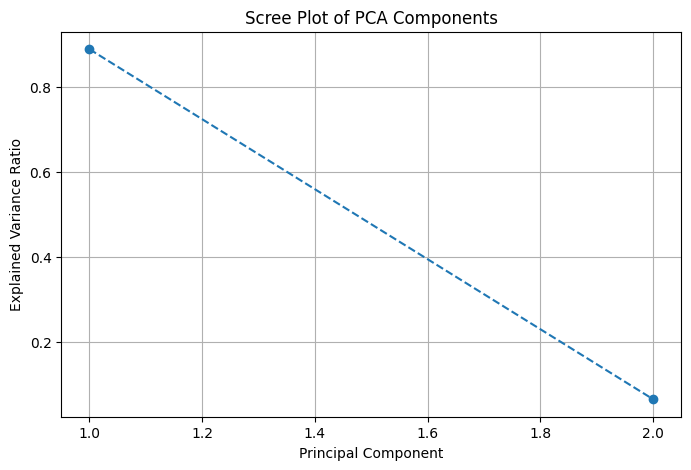

In [9]:
# Scree plot (Explained Variance)
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel("Principal Component")
plt.ylabel("Explained Variance Ratio")
plt.title("Scree Plot of PCA Components")
plt.grid()
plt.show()

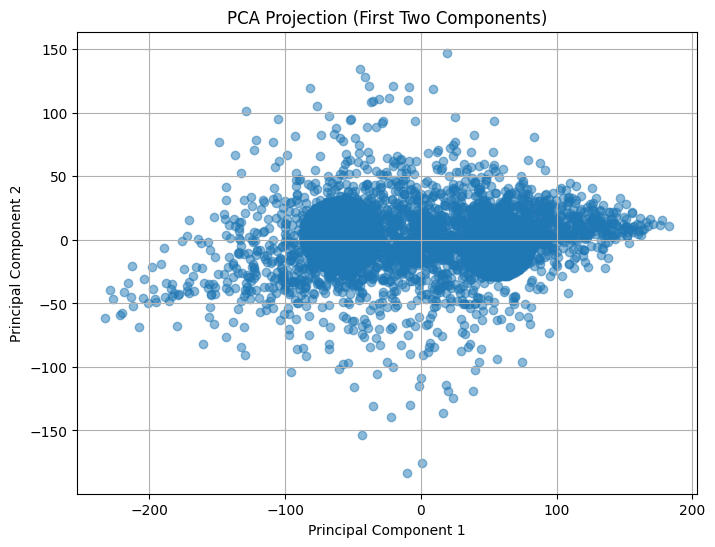

In [10]:
# PCA Projection (First Two Components)
plt.figure(figsize=(8, 6))
plt.scatter(features_pca[:, 0], features_pca[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection (First Two Components)")
plt.grid()
plt.show()